## Лаб.05

### Применение CNN для классификации изображений

---

#### Задание:
Познакомиться с основами применения сверточных ИНС для распознавания изображений. Исходные данные – в наборе CIFAR-10, который входит в коллекцию Keras (модуль datasets). Описание набора [здесь](https://keras.io/api/datasets/cifar10/).

Это набор небольших цветных изображений, относящихся к 10 классам: самолеты, автомобили, птицы и др. Размер изображений – 32 на 32 пикселя.

Набор разделен на обучающие и тестовые данные: 50000 и 10000 размеченных изображений соответственно.

Задача распознавания заключается в отнесении входного изображения (в указанном формате) к одному из 10 классов. В ходе выполнения задания необходимо создать модель сверточной ИНС для решения поставленной задачи.

**Порядок выполнения работы:**
1. Импортируйте набор данных CIFAR-10. Создайте обучающую и тестовую выборки (метод `load_data()`).
2. Для удобства создайте текстовые метки классов:<br>`classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']`
3. Выведите любые 50 изображений из обучающей выборки вместе с соответствующими метками классов.
4. Выполните масштабирование входных данных (обучающих и тестовых).
5. Выполните бинарное кодирование меток классов (обучающих и тестовых). Проконтролируйте результат.
6. Создайте модель CNN, похожую на LeNet-5:
  * первый сверточный блок:
    * два сверточных слоя с 32 ядрами, размер ядер 3×3, с сохранением размерности;
    * объединяющий слой MaxPooling с размером окна 2×2;
  * слой прореживания с вероятностью отключения нейронов 0,25;
  * второй сверточный блок:
    * два сверточных слоя с 64 ядрами, размер ядер 3×3, без сохранения размерности;
    * объединяющий слой MaxPooling с размером окна 2×2;
  * слой прореживания с вероятностью отключения нейронов 0,25;
  * слой преобразования данных в плоское представление;
  * полносвязный слой классификации с 512 нейронами;
  * слой прореживания с вероятностью отключения нейронов 0,5;
  * выходной полносвязный слой.<br>Функция активации на всех слоях, кроме выходного – ReLU.
7. Выведите информацию о полученной архитектуре и количестве параметров модели. Проконтролируйте правильность архитектуры.
8. Скомпилируйте модель.
9. Запустите процесс обучения сети с использованием проверочного набора (10% от обучающих данных) и выводом информации о процессе обучения. Установите 25 эпох обучения, размер батча - 128.
10. Выполните оценку качества обученной модели на тестовых данных. Для CNN с описанной выше архитектурой и параметрами обучения значение метрики accuracy должно получиться около 0,79.
11. Визуализируйте динамику процесса обучения с помощью графиков доли правильных ответов (на обучающем и проверочном наборе) и графиков функции ошибки. Сделайте вывод о возможной переобученности модели.
12. Сохраните обученную модель.
13. Примените обученную модель для распознавания произвольного изображения из тестового набора:
  * сохраните элемент массива x_test с произвольным индексом в отдельную переменную<br>`x = x_test[<индекс>]`
  * преобразуйте его в массив из одного элемента (чтобы метод `predict()` мог правильно обработать эти входные данные)<br>`x = np.expand_dims(x, axis=0)`
  * примените модель для распознавания x; выведите полученные вероятности принадлежности классам и метку класса, имеющего наибольшую вероятность (метод `numpy.argmax()`)
  * выведите само изображение<br>`plt.imshow(X_test[<индекс>].reshape(32, 32))`
  * и правильный ответ (значение `y_test[<индекс>]`)
  * оцените полученные результаты; поэкспериментируйте с другими изображениями из массива `x_test`
14. Примените обученную модель для распознавания изображения, не включенного ни в обучающий, ни в тестовый набор:
  * загрузите в Colab файл изображения, которое нужно распознать (любое изображение по собственному выбору)<br>`from google.colab import files`<br>`files.upload()`<br>после запуска ячейки с кодом можно будет выбрать файл для загрузки; после загрузки файл должен появиться в вертикальной панели слева;
  * загрузите изображение в программу, используя инструментарий модуля preprocessing, с указанием целевого размера изображения 32 на 32 пикселя:<br>`from tensorflow.keras.preprocessing import image`<br>`img = image.load_img(<имя файла>, target_size=(32, 32))`
  * выведите полученное изображение;
  * преобразуйте картинку в массив:<br>`x = image.img_to_array(img)`
  * выполните масштабирование, сформируйте массив из одного элемента и подайте на вход обученной модели для распознавания;
  * получите ответ модели и оцените правильность распознавания.

---

1. Импортируйте набор данных CIFAR-10. Создайте обучающую и тестовую выборки (метод `load_data()`).

In [ ]:
# import the CIFAR-10 dataset and create training and test sets (method `load_data()`)

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
# create training and test sets (method `load_data()`)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

---

2. Для удобства создайте текстовые метки классов:<br>`classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']`

In [ ]:
# for convenience, create text class labels
# classes = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship' ', 'truck']

classes = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

---

3. Выведите любые 50 изображений из обучающей выборки вместе с соответствующими метками классов.

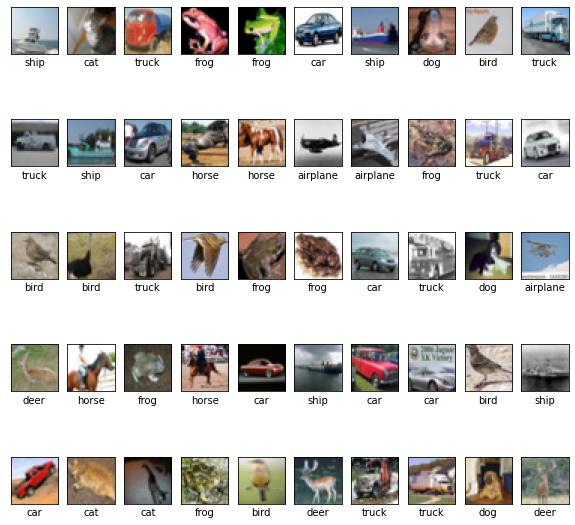

In [ ]:
# output any 50 images from the training set along with the corresponding class labels

plt.figure(figsize=(10, 10))

n = 100

for i in range(n, n + 50):
    plt.subplot(5, 10, i - n + 1)

    plt.xticks([])

    plt.yticks([])

    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)

    plt.xlabel(classes[y_train[i][0]])

---

4. Выполните масштабирование входных данных (обучающих и тестовых).

In [ ]:
# scale the input data (training and test)

x_train = x_train / 255
x_test = x_test / 255

---

5. Выполните бинарное кодирование меток классов (обучающих и тестовых). Проконтролируйте результат.

In [ ]:
# binary encode class labels (training and test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# check the results

y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

---

6. Создайте модель CNN, похожую на LeNet-5:
  * первый сверточный блок:
    * два сверточных слоя с 32 ядрами, размер ядер 3×3, с сохранением размерности;
    * объединяющий слой MaxPooling с размером окна 2×2;
  * слой прореживания с вероятностью отключения нейронов 0,25;
  * второй сверточный блок:
    * два сверточных слоя с 64 ядрами, размер ядер 3×3, без сохранения размерности;
    * объединяющий слой MaxPooling с размером окна 2×2;
  * слой прореживания с вероятностью отключения нейронов 0,25;
  * слой преобразования данных в плоское представление;
  * полносвязный слой классификации с 512 нейронами;
  * слой прореживания с вероятностью отключения нейронов 0,5;
  * выходной полносвязный слой.<br>Функция активации на всех слоях, кроме выходного – ReLU.

In [ ]:
# create a CNN (convolutional neural network) model similar to LeNet-5
model = Sequential()

#   * first convolution block
#     * two convolutional layers with 32 cores, the size of the cores is 3×3, while maintaining the dimension
#     * merging layer MaxPooling with a window size of 2×2

# the cores do the transformation to the original pixels... usually you can use cores with dimension 3x3, 7x7, etc... In this case the are 3x3
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2))) # <- MaxPooling takes the largest pixels resulting from the previous layers (that's why it's called MaxPooling) and makes a transformation

#   * dropout layer with a probability of disconnecting neurons 0.25
model.add(Dropout(0.25)) # <- we are diconnecting 25% of the neurons to improve the performance

# * second convolution block
#     * two convolutional layers with 64 cores, core size 3×3, without dimensionality saving
#     * merging layer MaxPooling with a window size of 2×2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#   * dropout layer with a probability of disconnecting neurons 0.25
model.add(Dropout(0.25))

#   * a layer of data transformation into a flat representation
model.add(Flatten())

#   * fully connected classification layer with 512 neurons
model.add(Dense(512, activation='relu'))

#   * dropout layer with a probability of disconnecting neurons 0.5
model.add(Dropout(0.5))

#   * output fully connected layer. Activation function on all layers except the output one – ReLU
model.add(Dense(10, activation='softmax'))

---

7. Выведите информацию о полученной архитектуре и количестве параметров модели. Проконтролируйте правильность архитектуры.

In [ ]:
# output information about the resulting architecture and the number of model parameters

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        36928     
                                                        

---

8. Скомпилируйте модель.

In [ ]:
# compile the model

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

---

9. Запустите процесс обучения сети с использованием проверочного набора (10% от обучающих данных) и выводом информации о процессе обучения. Установите 25 эпох обучения, размер батча - 128.

In [ ]:
# run the network training process using the test set (10% of the training data) and output
# information about the training process. set training epochs to 25, batch size to 128

history = model.fit(x_train, y_train, batch_size=128, epochs=25, validation_split=0.1)

Epoch 1/25
352/352 [==============================] - 11s 19ms/step - loss: 1.6562 - accuracy: 0.3928 - val_loss: 1.2622 - val_accuracy: 0.5504
Epoch 2/25
352/352 [==============================] - 4s 11ms/step - loss: 1.2397 - accuracy: 0.5595 - val_loss: 1.0802 - val_accuracy: 0.6158
Epoch 3/25
352/352 [==============================] - 4s 11ms/step - loss: 1.0568 - accuracy: 0.6253 - val_loss: 0.9056 - val_accuracy: 0.6838
Epoch 4/25
352/352 [==============================] - 4s 12ms/step - loss: 0.9451 - accuracy: 0.6698 - val_loss: 0.8052 - val_accuracy: 0.7204
Epoch 5/25
352/352 [==============================] - 4s 11ms/step - loss: 0.8665 - accuracy: 0.6950 - val_loss: 0.7734 - val_accuracy: 0.7332
Epoch 6/25
352/352 [==============================] - 4s 11ms/step - loss: 0.8003 - accuracy: 0.7192 - val_loss: 0.6899 - val_accuracy: 0.7588
Epoch 7/25
352/352 [==============================] - 4s 12ms/step - loss: 0.7469 - accuracy: 0.7380 - val_loss: 0.6827 - val_accuracy: 0.763

---

10. Выполните оценку качества обученной модели на тестовых данных. Для CNN с описанной выше архитектурой и параметрами обучения значение метрики accuracy должно получиться около 0,79.

In [ ]:
# evaluate the quality of the trained model on the test data

test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

# we expected a result over 0.79, so everything is fine!

313/313 [==============================] - 1s 4ms/step - loss: 0.6380 - accuracy: 0.7965
Test accuracy: 0.796500027179718


---

11. Визуализируйте динамику процесса обучения с помощью графиков доли правильных ответов (на обучающем и проверочном наборе) и графиков функции ошибки. Сделайте вывод о возможной переобученности модели.

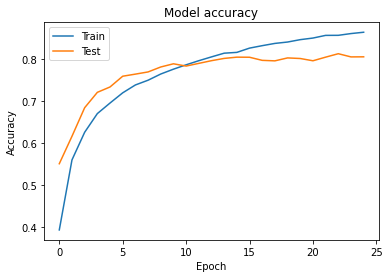

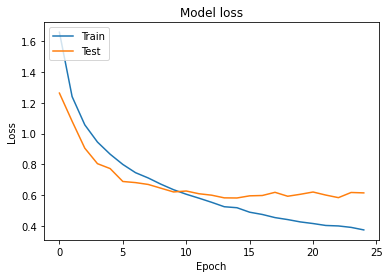

In [ ]:
# visualize the dynamics of the learning process with correct response plots (on training and validation set) and error function plots

# plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# in this case we have a very good accuracy for the train set and for validation
# and the loss also have good values for both sets but better for the train set
# maybe because we are using only 10% of the data for validation (small)

---

12. Сохраните обученную модель.

In [ ]:
# save the model

model.save('convolutional_neural_network')

---

13. Примените обученную модель для распознавания произвольного изображения из тестового набора:
  * сохраните элемент массива x_test с произвольным индексом в отдельную переменную<br>`x = x_test[<индекс>]`
  * преобразуйте его в массив из одного элемента (чтобы метод `predict()` мог правильно обработать эти входные данные)<br>`x = np.expand_dims(x, axis=0)`
  * примените модель для распознавания x; выведите полученные вероятности принадлежности классам и метку класса, имеющего наибольшую вероятность (метод `numpy.argmax()`)
  * выведите само изображение<br>`plt.imshow(X_test[<индекс>].reshape(32, 32))`
  * и правильный ответ (значение `y_test[<индекс>]`)
  * оцените полученные результаты; поэкспериментируйте с другими изображениями из массива `x_test`

[[9.9499452e-01 1.5349934e-04 2.0553363e-05 7.5266621e-06 2.5778500e-06
  6.1274308e-10 3.5308310e-09 1.7652201e-08 4.1654259e-03 6.5577205e-04]]

 - Predicted label: 0 -> airplane


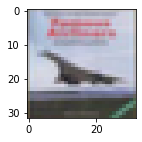


 - Real label value: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] -> airplane


In [ ]:
# apply the trained model to recognize an arbitrary image from the test set

# * save the array element x_test with an arbitrary index into a separate variable x = x_test[<index>]
x = x_test[3]

#   * convert it to an array of one element (so that the predict() method can properly process this input) x = np.expand_dims(x, axis=0)
x = np.expand_dims(x, axis=0)

#   * apply the model to recognize x; print the resulting class probabilities and the label of the class with the highest probability (numpy.argmax() method)
print(model.predict(x))
print(f"\n - Predicted label: {np.argmax(model.predict(x))} -> {classes[np.argmax(model.predict(x))]}")

#   * display the image itself plt.imshow(X_test[<index>])
plt.figure(figsize=(2, 2))
plt.imshow(x_test[3])
plt.show()

#   * and the correct answer (the value of y_test[<index>])
print(f"\n - Real label value: {y_test[3]} -> {classes[np.argmax(y_test[3])]}")

#   * evaluate the results; experiment with other images from the x_test array

---

14. Примените обученную модель для распознавания изображения, не включенного ни в обучающий, ни в тестовый набор:
  * загрузите в Colab файл изображения, которое нужно распознать (любое изображение по собственному выбору)<br>`from google.colab import files`<br>`files.upload()`<br>после запуска ячейки с кодом можно будет выбрать файл для загрузки; после загрузки файл должен появиться в вертикальной панели слева;
  * загрузите изображение в программу, используя инструментарий модуля preprocessing, с указанием целевого размера изображения 32 на 32 пикселя:<br>`from tensorflow.keras.preprocessing import image`<br>`img = image.load_img(<имя файла>, target_size=(32, 32))`
  * выведите полученное изображение;
  * преобразуйте картинку в массив:<br>`x = image.img_to_array(img)`
  * выполните масштабирование, сформируйте массив из одного элемента и подайте на вход обученной модели для распознавания;
  * получите ответ модели и оцените правильность распознавания.

In [ ]:
# apply the trained model to recognize an image that is not included in either the training or test set

from google.colab import files
from tensorflow.keras.preprocessing import image
files.upload()

<img src="lab_05_frog.png" width="150">

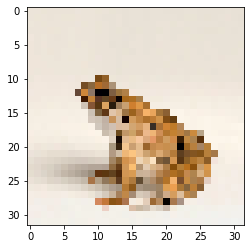

6 frog


In [ ]:
# we are using a random image from Google to test our model

img = image.load_img('dataset-card.png', target_size=(32, 32))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = x / 255
x = np.expand_dims(x, axis=0)

print(np.argmax(model.predict(x)), classes[np.argmax(model.predict(x))])

In [ ]:
# apply the trained model to recognize an image that is not included in either the training or test set

from google.colab import files
from tensorflow.keras.preprocessing import image
files.upload()

<img src="lab_05_plane.jpg" width="150">

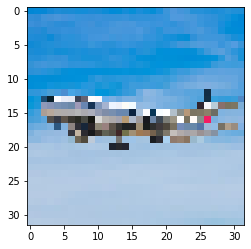

0 airplane


In [ ]:
# we are using a random image from Google to test our model

img = image.load_img('dataset-card.jpg', target_size=(32, 32))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = x / 255
x = np.expand_dims(x, axis=0)

print(np.argmax(model.predict(x)), classes[np.argmax(model.predict(x))])